In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
path ='/gdrive/My Drive/Online_ML : Weekends Nov 2020/Data/'

In [6]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline


In [7]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv(path+'recipes_muffins_cupcake.csv')
recipes

,Type,Flour,Sugar
0,Muffin,55,3
1,Muffin,47,12
2,Muffin,47,18
3,Muffin,45,17
4,Muffin,50,12
5,Muffin,55,3
6,Muffin,54,7
7,Muffin,47,10
8,Muffin,50,17
9,Muffin,50,17


In [8]:
# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Sugar']

In [9]:
from sklearn.preprocessing import LabelEncoder


recipe_type_encoder = LabelEncoder()

recipes['Type'] = recipe_type_encoder.fit_transform(recipes['Type'])
recipes.head()

,Type,Flour,Sugar
0,1,55,3
1,1,47,12
2,1,47,18
3,1,45,17
4,1,50,12


In [10]:
# Specify inputs for the model
x = recipes[['Flour','Sugar']]
x

,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12
5,55,3
6,54,7
7,47,10
8,50,17
9,50,17


In [11]:
y = recipes['Type']
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Type, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
theta_0 = model.intercept_[0]
print('theta_0 ={}'.format(theta_0))

theta_0 =-39.15124062620957


In [17]:
theta = model.coef_[0]
print('theta_1 ={}, theta_2 ={}'.format(theta[0], theta[1]))

theta_1 =0.9800068467133012, theta_2 =-0.2086799629774003


In [19]:
print('Min and Max of Sugar ={},{}'.format(recipes['Sugar'].min(), recipes['Sugar'].max()))
print('Min and Max of Flour ={},{}'.format(recipes['Flour'].min(), recipes['Flour'].max()))

Min and Max of Sugar =3,31
Min and Max of Flour =34,55


In [20]:
Flour_for_line = np.linspace(30,60)
sugar_for_line = -(theta_0 + theta[0]*Flour_for_line)/theta[1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 40.0)

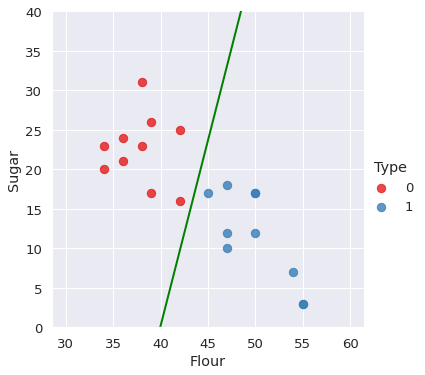

In [24]:
sns.lmplot('Flour','Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(Flour_for_line,sugar_for_line, linewidth=2, color='green')
plt.ylim(0,40)

In [25]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
svm_theta_0 = svm_model.intercept_[0]
print('SVM theta_0={}'.format(svm_theta_0))

SVM theta_0=-28.993497423663204


In [28]:
svm_theta = svm_model.coef_[0]
print('SVM theta 1 = {}, theta 2 = {}'.format(svm_theta[0], svm_theta[1]))

SVM theta 1 = 0.666537262162451, theta 2 = -4.852668907809332e-05


In [29]:
flour_line = np.linspace((x['Flour'].min())-5,(x['Flour'].max())+5)
sugar_line = -(svm_theta_0 + svm_theta[0]*flour_line)/svm_theta[1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 40.0)

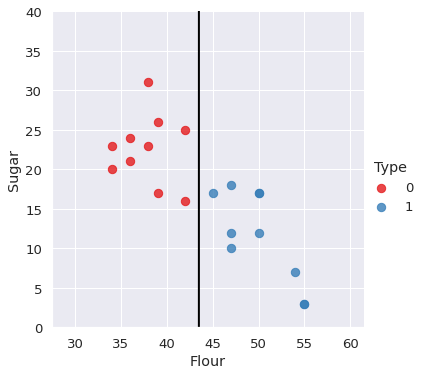

In [30]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(flour_line, sugar_line, linewidth=2, color='black');
plt.ylim(0, 40)

In [31]:
svm_model.support_

array([11, 15,  3], dtype=int32)

In [32]:
svm_model.support_vectors_

array([[42., 16.],
       [42., 25.],
       [45., 17.]])

In [33]:
svm_model.n_support_

array([2, 1], dtype=int32)

Predict New Case

In [34]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(Flour, Sugar):
    if(svm_model.predict([[Flour, Sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [35]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a cupcake recipe!


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 40.0)

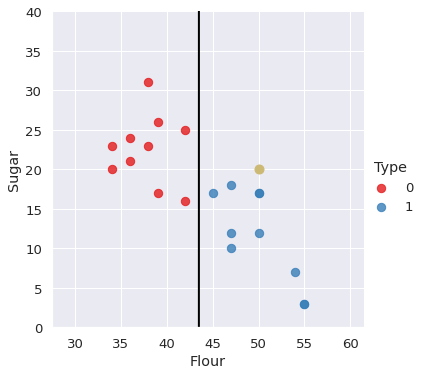

In [36]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(flour_line, sugar_line, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');
plt.ylim(0,40)